In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
import math
from IPython.display import display, clear_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from IPython.display import HTML
import os
from os import listdir
import imageio
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def gifs():
    png_dir = 'png/'
    images = []
    imgs=listdir(png_dir)
    for k in range(len(imgs)):
        imgs[k] = int(imgs[k][:len(imgs[k])-4])
    imgs = sorted(imgs)
    for i in range(len(imgs)):
        imgs[i] = str(imgs[i])+'.png'
    for file_name in imgs:
        if file_name.endswith('.png'):
            file_path = os.path.join(png_dir, file_name)
            images.append(imageio.imread(file_path))
    imageio.mimsave('movie.gif', images, fps=1)   
    
def acc(y_test,predictions,targets):
    print('accuracy scores : ',accuracy_score(y_test,predictions))
    confusion_matri = confusion_matrix(y_test, predictions, labels=targets)
    fig, ax = plot_confusion_matrix(conf_mat=confusion_matri,
                                    colorbar=True,
                                    show_absolute=True,
                                    show_normed=False)
    plt.show()
    
    
def most_frequent(List): 
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num

def ed(point1,point2):
    eds = math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)
    return eds

def wrong_plot(predictions,y_test,X_test,X_train,y_train):
    ind = []
    for i in range(len(predictions)):
        if predictions[i] != y_test.values[i]:
            ind.append(y_test.index.values[i])
    fig = plt.figure(figsize = (20,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('PC1', fontsize = 15)
    ax.set_ylabel('PC2', fontsize = 15)
    ax.set_title('predicted plot showing wrong predicted points', fontsize = 20)
    targets = list(set(y_train))
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = y_train == target
        ax.scatter(X_train.loc[indicesToKeep, 'PC1']
                   , X_train.loc[indicesToKeep, 'PC2']
                   , c = color
                   , s = 50)
    predictions = pd.Series(predictions)
    predictions.index = y_test.index
    for target, color in zip(targets,colors):
        indicesToKeep = predictions == target
        ax.scatter(X_test.loc[indicesToKeep, 'PC1']
                   , X_test.loc[indicesToKeep, 'PC2']
                   , c = color
                   , s = 50)
    predictions = predictions[ind]
    X_test = X_test.loc[ind]
    for target, color in zip(targets,colors):
        indicesToKeep = predictions == target
        ax.scatter(X_test.loc[indicesToKeep, 'PC1']
                   , X_test.loc[indicesToKeep, 'PC2']
                   , s = 300, facecolors='none', edgecolors='black')
    ax.legend(targets)
    ax.grid()
    plt.show()
    
def actual_plot(predictions,y_test,X_test,X_train,y_train):
    ind = []
    for i in range(len(predictions)):
        if predictions[i] != y_test.values[i]:
            ind.append(y_test.index.values[i])
    fig = plt.figure(figsize = (20,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('PC1', fontsize = 15)
    ax.set_ylabel('PC2', fontsize = 15)
    ax.set_title('actual plot showing real plot', fontsize = 20)
    targets = list(set(y_train))
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = y_train == target
        ax.scatter(X_train.loc[indicesToKeep, 'PC1']
                   , X_train.loc[indicesToKeep, 'PC2']
                   , c = color
                   , s = 50)
    predictions = pd.Series(predictions)
    predictions.index = y_test.index
    for target, color in zip(targets,colors):
        indicesToKeep = y_test == target
        ax.scatter(X_test.loc[indicesToKeep, 'PC1']
                   , X_test.loc[indicesToKeep, 'PC2']
                   , c = color
                   , s = 50)
    predictions = predictions[ind]
    X_test = X_test.loc[ind]
    for target, color in zip(targets,colors):
        indicesToKeep = predictions == target
        ax.scatter(X_test.loc[indicesToKeep, 'PC1']
                   , X_test.loc[indicesToKeep, 'PC2']
                   , s = 300, facecolors='none', edgecolors='black')
    ax.legend(targets)
    ax.grid()
    plt.show()
    
    
def train_plot(X_train,y_train):
    fig = plt.figure(figsize = (20,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('PC1', fontsize = 15)
    ax.set_ylabel('PC2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = list(set(y_train))
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = y_train == target
        ax.scatter(X_train.loc[indicesToKeep, 'PC1']
                   , X_train.loc[indicesToKeep, 'PC2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()
    plt.show()
    
def test_plot(X_train, X_test, y_train, y_test,kva):    
    predictions = []
    for i in range(len(X_test)):
        disandind=[]
        for j in range(len(X_train)):
            ED = ed(X_test.values[i],X_train.values[j])
            disandind.append((ED,y_train.values[j],X_train.values[j]))
        disandind.sort(key=lambda x:x[0])
        disandind = disandind[:kva]
        votings = []
        for h in range(len(disandind)):
            votings.append(disandind[h][1])
        fig = plt.figure(figsize = (20,10))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('PC1', fontsize = 15)
        ax.set_ylabel('PC2', fontsize = 15)
        predictc = most_frequent(votings)
        predictions.append(predictc)
        ax.set_title("kv: "+str(kva)+" "+str(i)+" test_point : " + ' '.join(votings)+ '   predicted_class: '+ predictc, fontsize = 20)
        targets = list(set(y_train))
        targets.append('test_point')
        colors = ['r', 'g', 'b','orange']
        for target, color in zip(targets,colors):
            indicesToKeep = y_train == target
            ax.scatter(X_train.loc[indicesToKeep, 'PC1']
                       , X_train.loc[indicesToKeep, 'PC2']
                       , c = color
                       , s = 50)
        ax.legend(targets)
        for k in range(len(disandind)):
            l=[X_test.values[i][0]]
            m=[X_test.values[i][1]]
            l.append(disandind[k][2][0])
            m.append(disandind[k][2][1])
            ax.plot(l,m,c='black')
        ax.scatter(X_test.values[i][0],X_test.values[i][1],c='orange',s=150)
        ax.grid()
        fig = ax.get_figure()
        fig.savefig('png//'+str(i)+'.png',dpi=55)
        plt.show()
        clear_output(wait = True)
        plt.pause(0.8)
    return predictions,list(set(y_train))
    
def knn(dataset_path):
    df = pd.read_csv(dataset_path) #read iris-dataset
    print('\n dataset : \n',df,'\n\n')
    col_name = df.columns[-1]
    if type(df[col_name].values[0]) != type('string'):
        listser = [str(x) for x in df[col_name].values]
        df.drop(col_name, axis = 1, inplace = True)
        df[col_name] = listser
        
    #Standardize the Data
    
    
    features = df.columns[:len(df.columns)-1]
    # Separating out the features
    x = df.loc[:, features].values
    # Separating out the species
    y = df.loc[:,df.columns[-1]].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    print('standarized dataset : \n',pd.concat([pd.DataFrame(data = x, columns = features),df[df.columns[-1]]], axis = 1),'\n\n')
    
    
    #Standardize the Data
    
    
    
    #Principal Component Analysis (PCA)  for dimensionality reduction of 4 features

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    finaldf = pd.concat([pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2',]), df[df.columns[-1]]], axis = 1)
    print('dataset after PCA:\n',finaldf,'\n\n')
                         
    #Principal Component Analysis (PCA)  for dimensionality reduction of 4 features
    
    
    #split dataset into train_test
    X_train, X_test, y_train, y_test = train_test_split(finaldf[['PC1','PC2']], finaldf[finaldf.columns[-1]], test_size=0.33, random_state=32)
    train_plot(X_train,y_train)
    return X_train, X_test, y_train, y_test


enter dataset path :iris.csv
enter k val :7

 dataset : 
      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns] 


standarized dataset : 
      sepal_length  sepal_width  petal_length  petal_width    sp

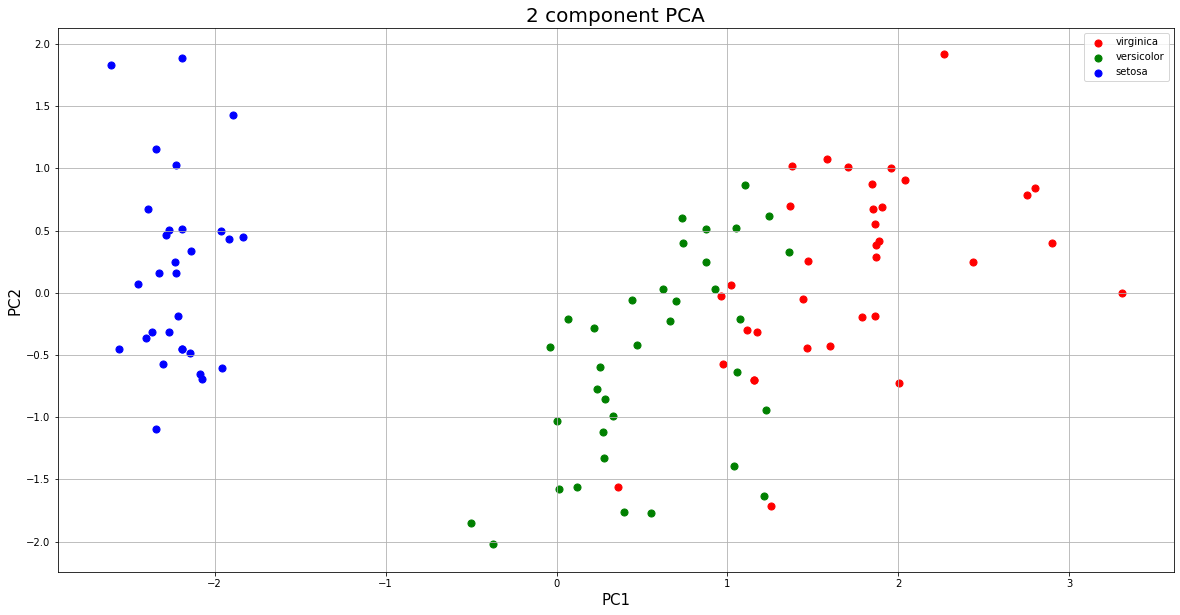

In [3]:
dataset_path = input('enter dataset path :')
k = int(input('enter k val :'))
X_train, X_test, y_train, y_test = knn(dataset_path)

accuracy scores by scikit knn classifier:  0.92
accuracy scores :  0.92


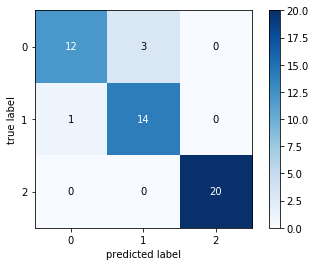

In [4]:
predictions,targets = test_plot(X_train, X_test, y_train, y_test,k)
gifs()
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train, y_train)
print('accuracy scores by scikit knn classifier: ',accuracy_score(y_test,neigh.predict(X_test)))
acc(y_test,predictions,targets)
HTML('<img src="movie.gif">') 

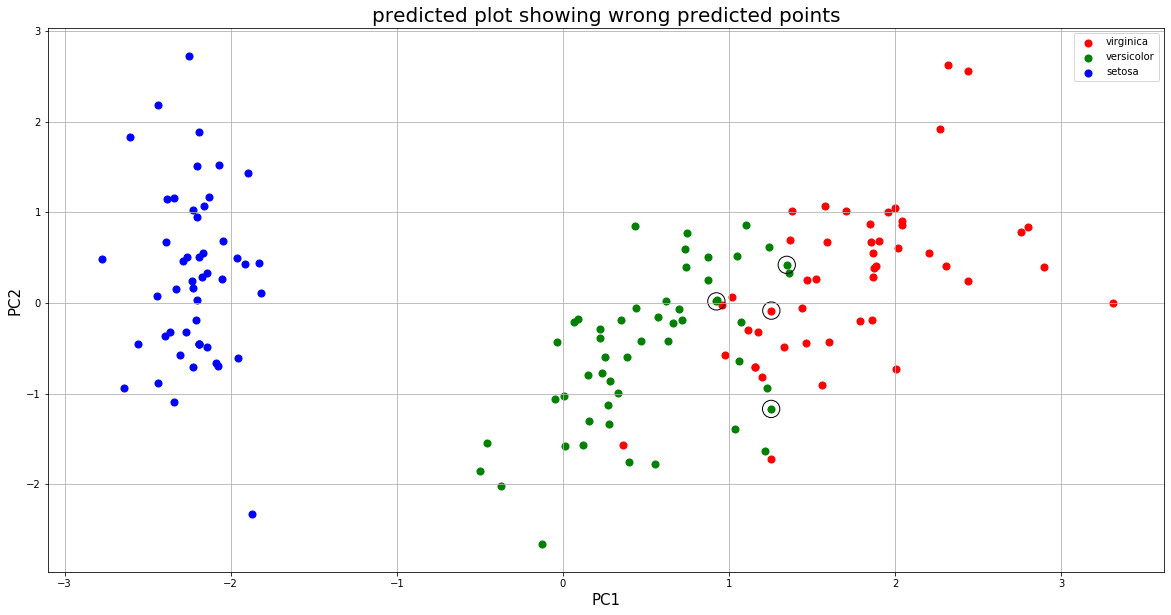

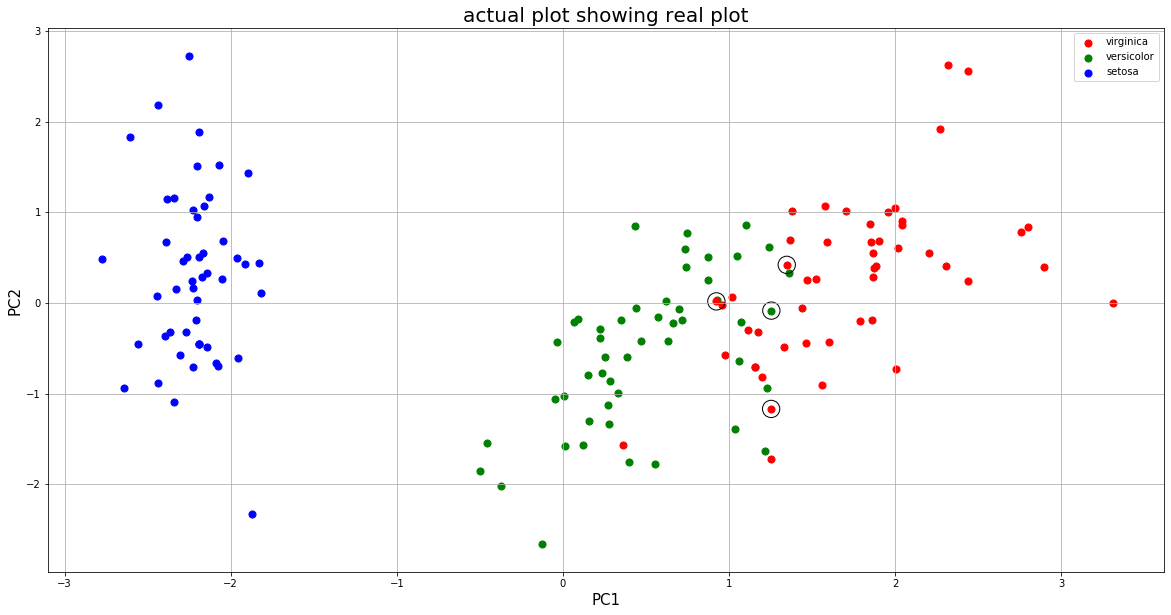

In [5]:
wrong_plot(predictions,y_test,X_test,X_train,y_train)
actual_plot(predictions,y_test,X_test,X_train,y_train)